<a href="https://colab.research.google.com/github/SahasPunchihewa/nl2sql_visualization/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets torch matplotlib seaborn pandas sqlalchemy db-sqlite3 scikit-learn numpy matplotlib jupyter


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.6 MB/s eta 0:00:0

In [2]:
import sqlite3

# Connect to the database (or create it if it doesn't exist)
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

# Create the students table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    id INTEGER PRIMARY KEY,
    name TEXT,
    age INTEGER,
    grade TEXT,
    marks INTEGER
)
''')

# Sample data: 20 records with different names, ages, grades, and marks
sample_data = [
    ('Alice Johnson', 20, 'A', 85),
    ('Bob Smith', 21, 'B', 76),
    ('Catherine Green', 22, 'C', 67),
    ('David Lee', 23, 'A', 92),
    ('Ella Brown', 20, 'B', 12),
    ('Frank White', 21, 'C', 65),
    ('Grace Adams', 22, 'A', 88),
    ('Harry Wilson', 23, 'B', 74),
    ('Ivy Thomas', 20, 'A', 90),
    ('Jack Nelson', 21, 'B', 79),
    ('Karen Scott', 22, 'C', 70),
    ('Leo Murphy', 23, 'A', 40),
    ('Mia Clark', 20, 'B', 81),
    ('Nathan Hall', 21, 'C', 60),
    ('Olivia King', 22, 'A', 87),
    ('Peter Wright', 23, 'B', 75),
    ('Quincy Evans', 20, 'C', 66),
    ('Rachel Baker', 21, 'A', 89),
    ('Sam Turner', 22, 'B', 39),
    ('Tina Martinez', 23, 'A', 91)
]

# Insert multiple records using executemany
cursor.executemany('''
INSERT INTO students (name, age, grade, marks)
VALUES (?, ?, ?, ?)
''', sample_data)

# Commit the transaction to save changes
conn.commit()

# Query and display the inserted data for verification
cursor.execute("SELECT * FROM students")
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 'Alice Johnson', 20, 'A', 85)
(2, 'Bob Smith', 21, 'B', 76)
(3, 'Catherine Green', 22, 'C', 67)
(4, 'David Lee', 23, 'A', 92)
(5, 'Ella Brown', 20, 'B', 12)
(6, 'Frank White', 21, 'C', 65)
(7, 'Grace Adams', 22, 'A', 88)
(8, 'Harry Wilson', 23, 'B', 74)
(9, 'Ivy Thomas', 20, 'A', 90)
(10, 'Jack Nelson', 21, 'B', 79)
(11, 'Karen Scott', 22, 'C', 70)
(12, 'Leo Murphy', 23, 'A', 40)
(13, 'Mia Clark', 20, 'B', 81)
(14, 'Nathan Hall', 21, 'C', 60)
(15, 'Olivia King', 22, 'A', 87)
(16, 'Peter Wright', 23, 'B', 75)
(17, 'Quincy Evans', 20, 'C', 66)
(18, 'Rachel Baker', 21, 'A', 89)
(19, 'Sam Turner', 22, 'B', 39)
(20, 'Tina Martinez', 23, 'A', 91)


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("xbrain/AutoSQL-nl2sql-1.0-8b")
model = AutoModelForCausalLM.from_pretrained("xbrain/AutoSQL-nl2sql-1.0-8b")

# Define a natural language query
query = """
Generate an SQL query for students who got marks less than 50.

Table structure:
  Table: students
  Fields: [id, name, age, grade, marks]
"""

# Tokenize the input query
inputs = tokenizer(query, return_tensors='pt')

# Generate SQL query from the input query
outputs = model.generate(inputs['input_ids'], max_length=50)

# Decode the generated SQL query
sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"NL2SQL Output: {sql_query}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00017.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

model-00002-of-00017.safetensors:   0%|          | 0.00/956M [00:00<?, ?B/s]

model-00003-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00004-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00005-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00006-of-00017.safetensors:   0%|          | 0.00/956M [00:00<?, ?B/s]

model-00007-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00008-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00009-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00010-of-00017.safetensors:   0%|          | 0.00/956M [00:00<?, ?B/s]

model-00011-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00012-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00013-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00014-of-00017.safetensors:   0%|          | 0.00/956M [00:00<?, ?B/s]

model-00015-of-00017.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00016-of-00017.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

model-00017-of-00017.safetensors:   0%|          | 0.00/235M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/17 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


NL2SQL Output: 
Generate an SQL query for students who got marks less than 50.

Table structure:
  Table: students
  Fields: [id, name, age, grade, marks]
  
SELECT * FROM students WHERE marks < 50;  


In [4]:
import re

result = re.search(r"(SELECT.*?;)", sql_query, re.DOTALL)
final_query = None

if result:
    print(result.group(1))
    final_query = result.group(1)
else:
    print("No SQL query found.")

SELECT * FROM students WHERE marks < 50;


In [5]:
if final_query is not None:
  cursor.execute(final_query)
  rows = cursor.fetchall()
  for row in rows:
      print(row)

(5, 'Ella Brown', 20, 'B', 12)
(12, 'Leo Murphy', 23, 'A', 40)
(19, 'Sam Turner', 22, 'B', 39)


SQL Query Results:
    id        name  age grade  marks
0   5  Ella Brown   20     B     12
1  12  Leo Murphy   23     A     40
2  19  Sam Turner   22     B     39
Predicted Chart Type: pie


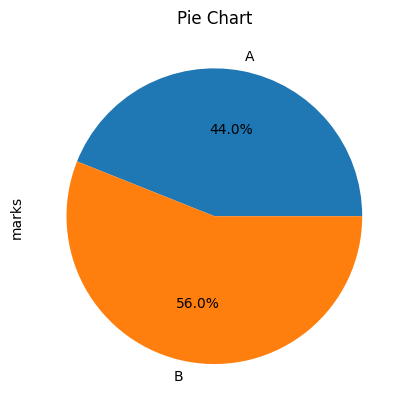

In [15]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Sample data to train the model (same as before)
data = {
    'sql_query': [
        'SELECT age, COUNT(*) FROM users GROUP BY age;',
        'SELECT date, sales FROM sales_data;',
        'SELECT category, SUM(sales) FROM sales GROUP BY category;'
    ],
    'data_structure': [
        'numerical, numerical',
        'time series, numerical',
        'categorical, numerical'
    ],
    'chart_type': [
        'bar',
        'line',
        'pie'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare features and labels
X = df[['data_structure']]
y = df['chart_type']

# Encode categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['data_structure'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Function to input SQL query, predict chart type, and visualize the results
def predict_and_visualize():
    input_sql_query = final_query

    # Execute the SQL query and fetch the results
    try:
        result_df = pd.read_sql_query(input_sql_query, conn)
        print("SQL Query Results:\n", result_df)
    except Exception as e:
        print("Error executing query:", e)
        return

    # Determine the data structure based on the SQL query
    data_structure = get_data_structure_from_sql_query(input_sql_query)

    # Prepare new data for prediction
    new_data = pd.DataFrame({'data_structure': [data_structure]})

    # Use the trained model to predict the chart type
    predicted_chart_type = model.predict(new_data)

    print(f'Predicted Chart Type: {predicted_chart_type[0]}')

    # Visualize the SQL output based on the predicted chart type
    visualize_data(result_df, predicted_chart_type[0])

# Function to extract data structure from SQL query (same as before)
def get_data_structure_from_sql_query(sql_query):
    # Simple rules to determine data structure
    if 'GROUP BY' in sql_query and 'COUNT' in sql_query:
        return 'numerical, numerical'  # Example for aggregated numerical data
    elif 'SELECT date' in sql_query:
        return 'time series, numerical'  # Time series data example
    elif 'SUM' in sql_query:
        return 'categorical, numerical'  # Aggregated categorical data
    else:
        return 'categorical, numerical'  # Default case for simplicity

# Function to visualize data based on predicted chart type
def visualize_data(data, chart_type):
    if chart_type == 'bar':
        # Assuming the first two columns are the ones to plot
        data.plot(x=data.columns[0], y=data.columns[1], kind='bar')
        plt.title('Bar Chart')
        plt.xlabel(data.columns[0])
        plt.ylabel('Count/Sum')
    elif chart_type == 'line':
        # Assuming the first column is the x-axis and the second is y-axis
        data.plot(x=data.columns[0], y=data.columns[1], kind='line')
        plt.title('Line Chart')
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
    elif chart_type == 'pie':
        # Using the 'grade' column for labels and 'marks' column for values
        if len(data.columns) >= 2:
            data.groupby(data.columns[3]).sum()[data.columns[4]].plot.pie(autopct='%1.1f%%')
            plt.title('Pie Chart')
        else:
            print("Insufficient data for pie chart.")
    else:
        print("Unsupported chart type for visualization.")

    plt.show()

# Call the prediction and visualization function
predict_and_visualize()
